# Project 1: Credit Card Fraud Detection

In [1]:
from google.colab import files
upload = files.upload()

Saving creditcardSubset.csv to creditcardSubset.csv


In [2]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

In [3]:
## Import all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## We want our plots to appear inside the notebook
%matplotlib inline

## Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score ,accuracy_score
from sklearn.model_selection import KFold

In [4]:
## Importing data
df1 = pd.read_csv("creditcardSubset.csv")
df1.head()

## Remove the Time feature
df = df1.drop('Time' , axis = 1)

In [5]:
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [6]:
df = df.drop('Unnamed: 0', axis = 1)

In [7]:
## Exploratory Data Analysis
cases = len(df)
nonfraud_count = len(df[df.Class ==0]) ## 0 = non fraud
fraud_count = len(df[df.Class ==1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

from termcolor import colored as cl # text customization
print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 9021
Number of Non-fraud cases are 8529
Number of fraud cases are 492
Percentage of fraud cases is 5.77
--------------------------------------------


In [8]:
## Training and Testing Data Split
X = df.drop('Class', axis = 1).values
y = df['Class'].values

## Set test_size as 0.2
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2 , random_state = 0)

In [9]:
## Model Fitting Process using
## Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_ypred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
## Model Fitting Process using
## Decision Tree Model
# once fit the model, make predictions using
# testing dataset X_test
## criterion="gini"

tree_model = DecisionTreeClassifier(criterion='gini')
tree_model.fit(X_train,y_train )
tree_ypred = tree_model.predict(X_test)

In [11]:
## Fit a Random Forest and make predictions using X_test

from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_ypred = rf.predict(X_test)

In [12]:
## Model Evaluation Process
## Using Classification Report
from sklearn.metrics import classification_report
## Print(classification_report(y_test, tree_ypred))

## Using Confusion Matrix
## Add true and predicted in the x and y axis
def plot_confusionmatrix(y_train_pred,y_train, dom, classes):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train,y_train_pred)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1700
           1       0.97      0.85      0.90       105

    accuracy                           0.99      1805
   macro avg       0.98      0.92      0.95      1805
weighted avg       0.99      0.99      0.99      1805

Test Confusion matrix


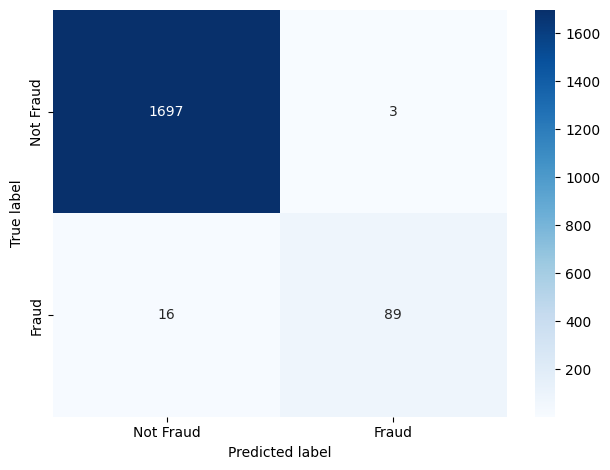

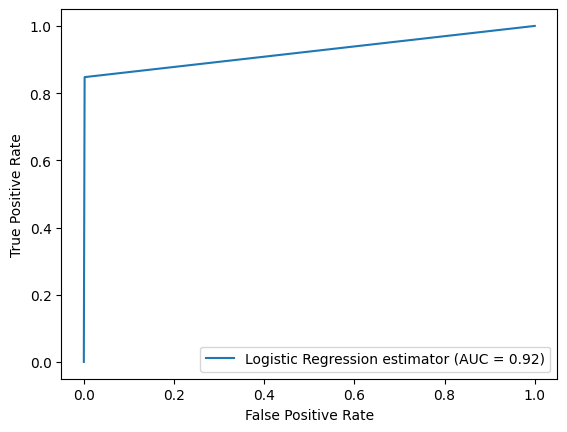

In [13]:
## Evaluate baseline Logistic Regression Model
classes =['Not Fraud', 'Fraud']

## get classification_report for the logistic regression
## predictions with the ground truth label for the testing dataset
print(classification_report(y_test, lr_ypred))

## plot the confusion matrix of the prediction labels with the
## ground truth label for the testing dataset
plot_confusionmatrix(lr_ypred,y_test,dom='Test', classes=classes)

fpr, tpr, thresholds = roc_curve(y_test, lr_ypred)
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                        estimator_name='Logistic Regression estimator')
display.plot()
plt.show()


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1700
           1       0.83      0.86      0.84       105

    accuracy                           0.98      1805
   macro avg       0.91      0.92      0.92      1805
weighted avg       0.98      0.98      0.98      1805

Test Confusion matrix


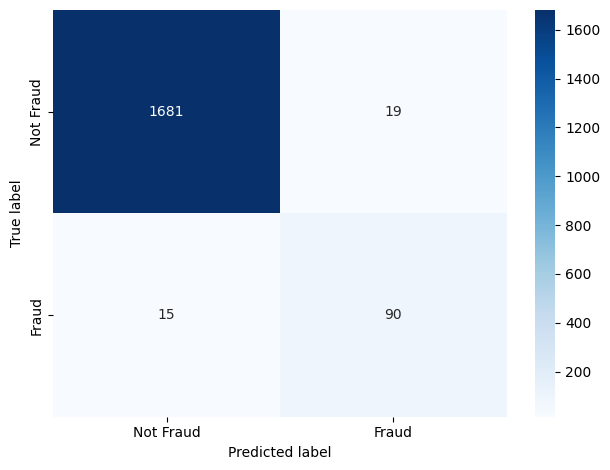

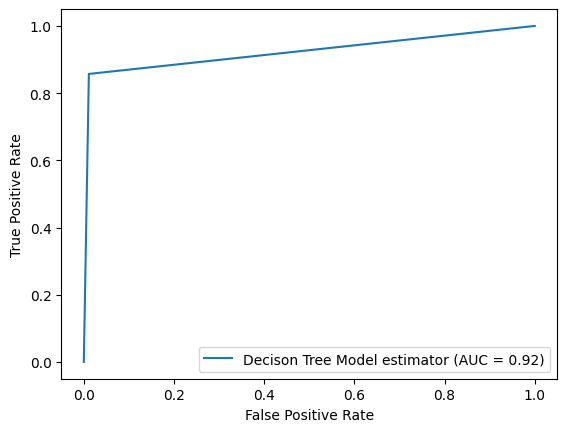

In [14]:
## Evaluate Decision Tree Model for classification
## using classification_report()
## using plot_confusionmatrix
## plot the ROC curve

print(classification_report(y_test, tree_ypred))
plot_confusionmatrix(tree_ypred,y_test,dom='Test', classes=classes)

fpr, tpr, thresholds = roc_curve(y_test, tree_ypred)
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                        estimator_name='Decison Tree Model estimator')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1700
           1       1.00      0.85      0.92       105

    accuracy                           0.99      1805
   macro avg       1.00      0.92      0.96      1805
weighted avg       0.99      0.99      0.99      1805

Test Confusion matrix


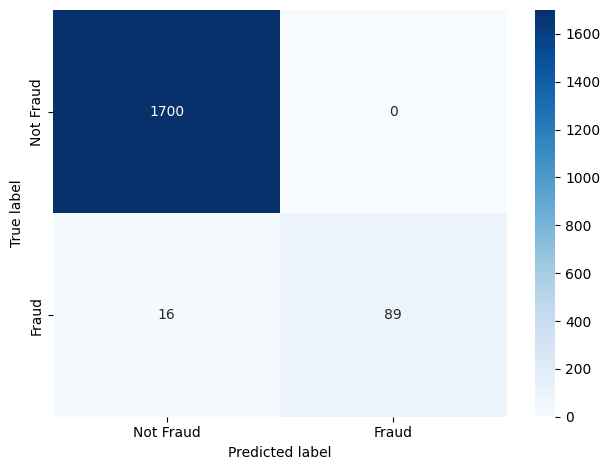

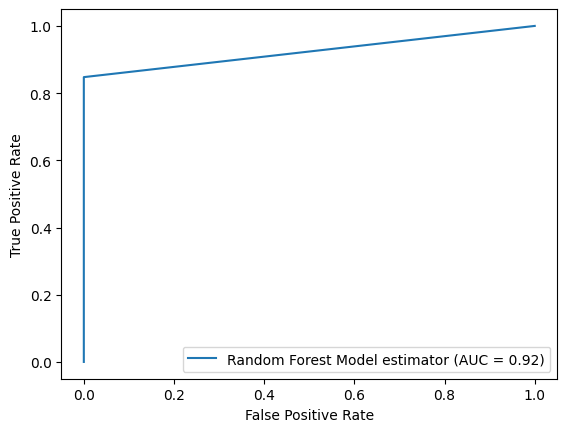

In [15]:
## Evaluate Random Forest Model for classification
## using classification_report()
## using plot_confusionmatrix
## Using plot_roc_curve

print(classification_report(y_test, rf_ypred))
plot_confusionmatrix(rf_ypred,y_test,dom='Test', classes=classes)

fpr, tpr, thresholds = roc_curve(y_test, rf_ypred)
from sklearn import metrics
roc_auc = metrics.auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                        estimator_name='Random Forest Model estimator')
display.plot()
plt.show()


In [16]:
## Fine-Tune Random Forest
## Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

class_weight=dict({0:1,1:100})

np.random.seed(42)

## n_estimators: 10, 100
## max_depth: 5, 10
## GridSearchCV: (10,5), (10,8), (10,10), (100,5)

## Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(class_weight= class_weight),
                           param_distributions= rf_grid,
                           cv=2,
                           n_iter=10,
                           verbose=True)

## Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

## Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

## Make predictions with tuned model
rs_rf.predict(X_test)


Fitting 2 folds for each of 10 candidates, totalling 20 fits


array([1, 1, 0, ..., 0, 0, 0])

<ipython-input-17-2d073566ff55>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


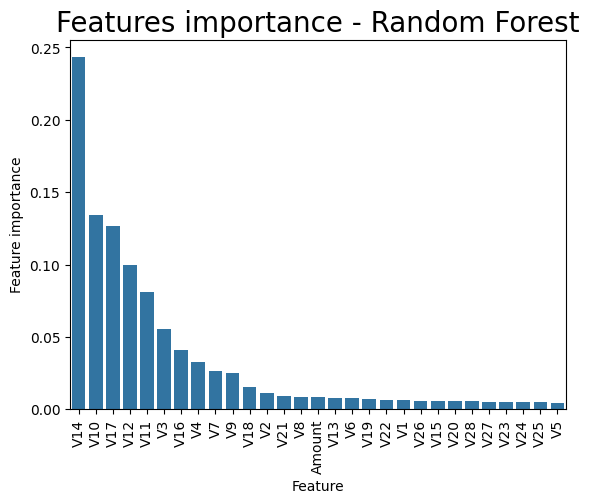

In [17]:
## Use the best model from the cross-validation process
## to fit the training data and
## create Feature Importance Plot
features = ["V1","V2","V3","V4","V5", "V6", "V7", "V8",
"V9","V10","V11","V12","V13", "V14",
"V15", "V16","V17","V18","V19","V20",
"V21", "V22", "V23", "V24", "V25", "V26",
"V27","V28", "Amount"]

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance', ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show()

The number of classes before fit Counter({0: 6829, 1: 387})
The number of classes after fit Counter({0: 6818, 1: 5110})
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1700
           1       0.80      0.90      0.84       105

    accuracy                           0.98      1805
   macro avg       0.90      0.94      0.92      1805
weighted avg       0.98      0.98      0.98      1805

Test Confusion matrix


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


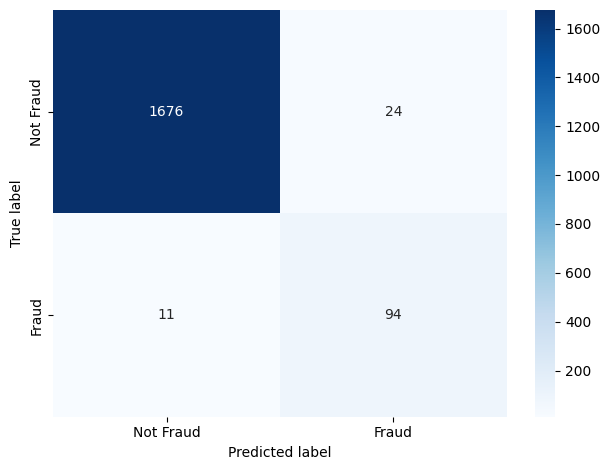

In [18]:
## Logistic Regression with SMOTE method to deal with the imbalanced dataset
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek(sampling_strategy=0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

classifier=LogisticRegression()
classifier.fit(X_train_ns,y_train_ns)

lrs_ypred=classifier.predict(X_test)
print(classification_report(y_test, lrs_ypred))
plot_confusionmatrix(lrs_ypred,y_test,dom='Test', classes=classes)